# 연습문제

아래 문제들을 해결하는 코드를 lab06.py 파일에 작성하여 제출하라.

### 연습 1

아래 코드를 실행하고 23.5입력하면 ValueError 오류가 발생한다. 

======

    n = int(raw_input("Please enter a number: "))

======

위 코드를 아래 조건들이 만족되도록 수정해라.

* 정수가 입력되지 않으면 제대로된 정수를 입력하라는 메시지를 보여주고 동일한 입력창이 다시 보이도록 한다.
* 정수가 입력되면 "정확히 입력되었다" 라는 확인 메시지를 보여주고 실행을 멈춘다. 

#### 견본 답안 1: `while` 문 활용

In [1]:
while True:
    try:
        n = int(raw_input("Please enter a number: "))
        print("정확히 입력되었습니다.")
        break
    except ValueError:
        print("정수를 입력하시오.")

Please enter a number: 76a
정수를 입력하시오.
Please enter a number: 234
정확히 입력되었습니다.


#### 견본 단안 2: 재귀함수 활용

* 재귀함수에 대해서는 이후에 배울 예정임

In [2]:
# 아래 `inpint()` 함수는 재귀함수이다.

def inpint():
    try:
        n = int(raw_input("Please enter a number: "))
        print("정확히 입력되었습니다.")
    except ValueError as e:
        print("정수를 입력하시오.")
        inpint()
        
inpint()

Please enter a number: 87a
정수를 입력하시오.
Please enter a number: 765
정확히 입력되었습니다.


### 연습 2

아래 코드를 실행하면 왜 어떤 결과가 나오는지 설명하라.

    try:
        x = float(raw_input("Your number: "))
        inverse = 1.0 / x
    finally:
        print("There may or may not have been an exception.")
    print("The inverse: ", inverse)

#### 견본답안

* `0`이 아닌 숫자를 입력하면 입력한 숫자의 역원를 보여준다.
* 숫자 `0`을 입력하면 `ZeroDivisionError`가 발생한다. 
* 숫자가 아닌 문자열을 입력하면 `IOError` 오류가 발생한다.
* 어떤 경우든 "There may or may not have been an exception." 라는 문장이 보여진다.

### 연습 3

아래 코드를 실행하면 왜 어떤 결과가 나오는지 설명하라.

    try:
        x = float(raw_input("Your number: "))
        inverse = 1.0 / x
    except ValueError:
        print "You should have given either an int or a float"
    except ZeroDivisionError:
        print "Infinity"
    finally:
        print("There may or may not have been an exception.")

#### 견본답안

* 숫자 `0`을 입력하면 `Infinity` 문자열이 보여지며 예외처리가 발생한다.
* 숫자가 아닌 문자열을 입력하면 "You should have given either an int or a float" 문장이 보여지며 예외처리 발생한다.
* 어떤 경우든 "There may or may not have been an exception." 라는 문장이 보여진다.

### 연습 4

아래 코드를 exception_test.py에 저장하라.

=========

    import sys
    file_name = sys.argv[1]
    text = []
    try:
        fh = open(file_name, 'r')
    except IOError:
        print 'cannot open', file_name
    else:
        text = fh.readlines()
        fh.close()

    if text:
        print text[100]
    
==========

이제 터미널에서 아래 명령을 실행하면 왜 어떤 일이 발생할 수 있는지 설명하라.

    python exception_test.py integers.txt
    
(주의: 위 명령은 exception_test.py 파일이 저장되어 있는 디렉토리에서 실행해야 한다.)

#### 견본답안

* `integers.txt` 파일이 해당 폴더에 존재하지 않으면 아래 문장이 보여지면 예외처리 된다. 

        'cannot open', integers.txt
        
* `integers.txt` 파일이 존재할 경우:
    - 파일에 한 줄도 없으면, 즉 비어 있으면:
        + 아무 결과도 보여지지 않는다.
        
    - 파일에 한 줄이 있지만 첫째줄에 100개 이하의 문자가 있다면:
        + IndexError 오류 발생
        
    - 파일에 한 줄 이상 있고 첫째줄에 100개 이상의 문자가 있다면:
        + 첫째줄의 백번째 문자를 보여줌.

### 연습 5

아래 코드를 실행하면 AssertionError가 발생한다. 아래 코드를 raise 함수를 이용하여 동일한 결과가 나오도록 수정하라.

    x = 5
    y = 3
    assert x < y, "x has to be smaller than y"

#### 견본답안

In [3]:
x=5
y=3
if(not(x<y)):
    raise AssertionError ('x has to be smaller than y') 

AssertionError: x has to be smaller than y

### 연습 6

함수 `f`가 아래와 같이 정의되었다.

    f(x) = sin(x) - 0.5 * x + 30

`f(x) = x`를 만족시키는 `x`를 함수 `f`의 고정점(fixed-point)이라 한다. 

함수 `f`의 부동점을 구하기 위해서 `f(x)` 반복적으로 업데이트 하는 고정점반복 기술을 아래와 같이 적용한다:

    x = sin(x) - a*x + 30

위 아래 코드가 고정점반복 기술을 적용하고 있다.

    x = 0.5
    a = 0.5
    for i in range(200):
        x = sin(x) - a * x + 30   #(*)
    print("The result after %s iteration is %s" % (i, x))
    
위 코드를 다음 조건이 만족되도록 수정하라.

* 아래의 절대값 조건이 만족될 때까지 고정점 계산 `(*)`이 반복되어야 한다.

        abs(f(x) - x) < 1e-8  

* 고정점 반복 계산이 200번 실행되었어도 앞서 언급된 절대값 조건이 만족되지 않으면 그 조건이 만족되지 않았다는 메시지를 보여주면서 에러가 발생하도록 해야 한다. 

In [4]:
from math import sin

x = 0.5
a = 0.5
for i in range(200):
    y = sin(x) - a * x + 30
    if(abs(y - x) < 1e-8):
        print("The result after %s iteration is %s" % (i, x))
        break
    else:
        x = y
    
if(i == 199):
    raise ReferenceError("unsatisfied")

The result after 59 iteration is 20.6492743683


#### 참고: 그래프 그리기

아래 등식

    x = sin(x) - 0.5 * x + 30 

를 만족시키는 x가 과연 존재하는지, 존재한다면 얼마정도인지를 먼저 확인할 필요가 있다. 그러기 위해서는 아래 함수의 그래프를 그려보아야 한다.
    
    g(x) = sin(x) - 1.5 * x + 30  
    
그래프를 그리는 방법은 나중에 배울 예정이지만, 아래와 같이 실행하면 된다.

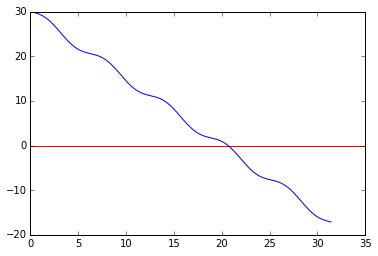

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.axhline(y=0, color = 'r') # draw y =0 axes

x = np.arange(0, 10 * np.pi, 0.01) 
y = np.sin(x) - 1.5 * x +30
plt.plot(x, y) 
plt.show()

따라서 `f(x) = sin(x) - 0.5 * x + 30`의 고정점은 `x = 20` 근처에 존재함을 알 수 있다.

### 연습 7

다음과 같이 수열이 정의되어 있다.

    x(n) = (sin(1/n))**2 / n
    
`x(n)` 값은 `n`이 증가함에 따라 `0`으로 수렴한다.  `x(n) >= 1e-9` 조건을 만족하는 모든 `x(n)`들의 리스트를 구하는 코드를 작성하라.  

In [6]:
n = 1
l = []

def x(n):
    return ((sin(1.0/n))**2) / n

while(x(n) >= 1e-9):
    l.append(x(n))
    n = n + 1

print("구해지는 리스트의 길이는 {}이다.\n".format(len(l)))
print(l)

구해지는 리스트의 길이는 999이다.

[0.7080734182735712, 0.11492442353296507, 0.03568545653717533, 0.015302179763703412, 0.007893900599711491, 0.004586921140438527, 0.00289567277772019, 0.0019429736430847011, 0.0013661063672529153, 0.0009966711079379186, 0.0007492473425149478, 0.0005773653515447893, 0.0004542690800538189, 0.00036381212690660413, 0.00029585759886068815, 0.0002438228990834671, 0.00020330696712110295, 0.00017129142947522438, 0.00014565927685327378, 0.00012489586804935584, 0.00010789810717986602, 9.384968862357277e-05, 8.213775286234534e-05, 7.229611040501128e-05, 6.39658739476123e-05, 5.686771737599582e-05, 5.0782037100596544e-05, 4.553457098365615e-05, 4.0985842358676154e-05, 3.7023321647961474e-05, 3.355554319132099e-05, 3.050764531095079e-05, 2.781795771096899e-05, 2.5435367459342786e-05, 2.331726928914343e-05, 2.1427958350770015e-05, 1.973736080751594e-05, 1.8220024439701387e-05, 1.6854310847202272e-05, 1.562174506292192e-05, 1.4506488893976699e-05, 1.3494912128924682e-05, 1.257524